# Sorting a list using Heapsort

**Code is provided at the end of the notebook**

- Author: Mehrdad Hassanzadeh<br/>
- Master of Data Science student 
- University: Sapienza University of Rome
- Institutional email address: hassanzadeh.1961575@studenti.uniroma1.it

In this code we want to write a heapsort that given a list will sort the list in ascending or descending order based on the choice of the user. 

For simplicity we will generate the list at random based on the number of the elements that the user wants. 

In [1]:
# To help us to generate the list at random 
from random import randint

### 1- Explaining of the algorithm

Given the list which the algorithm should sort, the algorithm will consider the list as a heap tree.

### 1.2- What is heap tree?

Heap tree is a complete binary tree in which:<br/>
1- Each node in tree has at most 2 children.<br/>
2- The two children of a non-leaf node will be called 'left child' and 'right child'.<br/>
3- Every level (depth) of the tree, except possibly the deepest (leaf level), is completely filled.

### 1.3- List as heap tree

A list will be considered as follows:<br/>
For an index i (by considering the list are zero-indexed) its left child is stored in the '2*i+1' index and the its right child is stored in the '2*i+2' index.<br/>

- **Note:** If the both indexes of the children of an index i exceeds the length of the list, that i'th index is a leaf node. 

Example: consider A = [1, 2, 3, 4, 5, 6]. Now here the heap tree will be considered as follows: <br/>
- '1' (index = 0) the root of the tree -> left child = '2' (index = 1), right child = '3' (index = 2)
- '2' (index = 1) non leaf node -> left child = '4' (index = 3), right child = '5' (index = 4)
- '3' (index = 2) non leaf node -> left child '6' (index = 5)
- '4' (index = 3, index * 2 + 1 > len(A)) -> leaf node
- '5' (index = 4, index *2 + 1 > len(A)) -> leaf node
- '6' (index = 5, index * 2 + 1 > len(A)) -> leaf node

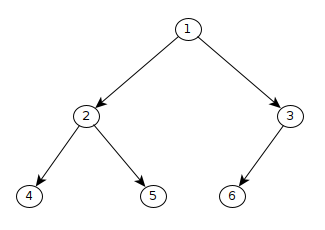

### 1.4 Root the biggest

Here we are considering sorting with MAX-Heap. In Max-Heap the root of the tree at each iteration should contain the maximum value among the elements in the list. 

When we want to put the maximum value in the root of the tree, we will use the 'Heapify' function which goes through the non-leaf nodes from bottom to up and put maximum amon the parent node and its children to the parent node. 

### 1.5 Extracting the maximum 

In order to sort the list, at each iteration we will put the maximum among all the elements in the list in the root of the tree and then pick that maximum and then look for the maximum among the rest. <br/>

- We will do this until there is no more element in the list. 

# 2- Implementation 

### 2.1- Heapify function 

This function will receive some parameters: 

1- List: A list should be sorted<br/>
2- Size: The size of the given list<br/>
3- Index: An index of an element in the list which corresponds to the index of a non-leaf node in the heap structure.

Given the parameters above, it will put **the maximum value** among the given **parent node and its direct children** in to **the parent node**. This process will be done in **top down** procedure so at the end in all the nodes **in the subtree of the parent node this property preserves**. 

You can see an example here: 

Assume that our list is [10, 3, 15, 5, 7, 8, 17, 6, 2]
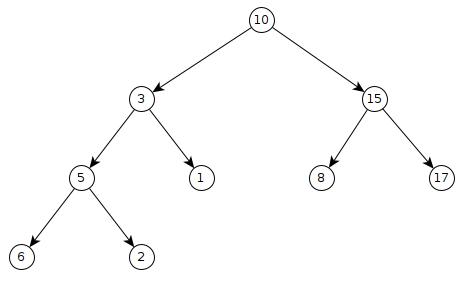

- Given the index 1 which contains the non-leaf node '3' the function will follow these steps: 

**Step 1:** 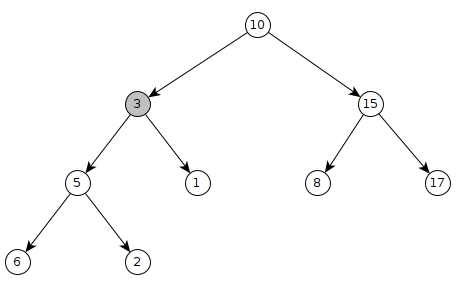

**Step 2:** 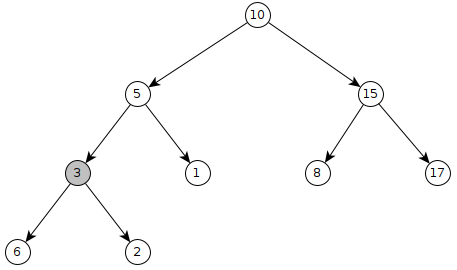

**Step 3:** 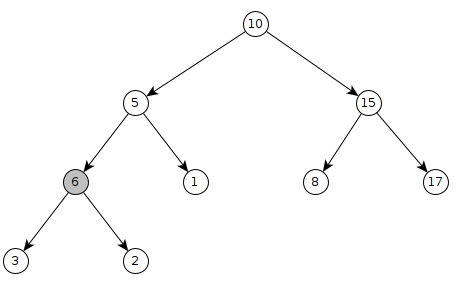

In [2]:
def Heapify(List, Size, Index):
    
    # Assume that the parent node is the maximum 
    LargestIndex = Index 
    
    # The index of the left child of the parent node
    LeftNode = 2 * Index + 1  
    
    # The index of the right child of the parent node
    RightNode = 2 * Index + 2 
  
    # If the left node exists and its value is greater than the parent node
    if LeftNode < Size and List[Index] < List[LeftNode]:
        
        # We take the index of the greatest one between parent and left child which is left child
        LargestIndex = LeftNode
  
    # If the right node exists and its value is greated than the greatest value between parent node and left sibiling
    if RightNode < Size and List[LargestIndex] < List[RightNode]:
        
        # Take the index of the right child which is the greatest
        LargestIndex = RightNode
    
    # If the parent node is not greatest
    if LargestIndex != Index:
        
        # Swap the value of the parent node and the greatest children 
        List[Index], List[LargestIndex] = List[LargestIndex], List[Index]
        
        # Go to that child and again follow the procedure as the value of the parent node is possible 
        # to be lower than the values of the children of its greatest child. 
        Heapify(List, Size, LargestIndex)


### 2.2 HeapSort function

In this function we will follow these steps: 

1- For each non-leaf node in the tree we will call the Heapify function in a bottom up procedure so that in each parent node the property that each parent node is greater than its children be preserved. 
* **After doing so the root of the tree will be containing the greatest value in the tree**. <br/>

2- Then at each iteration we will take out the root of the tree and swap it with the last element in the tree (list). Now we are considering a new list to sort without considering the last element which is the root of the previous tree which we know its sorted. <br/>

3- We will follow the above algorithm until we reach a list which only has one item in it. 


Parameters of the HeapSort: <br/>

1- List: The list which should be sorted<br/>
2- Descending: If False the result will be a sorted list in decreasing order and in increasing order if its False. The default value will be False. 

In [3]:
def HeapSort(List, Descending = False):
    
    # The length of the list
    Size = len(List)
    
    # For each non-leaf node 
    for NonLeafNodeIndex in range(Size // 2 - 1, -1, -1):
        
        # Call heapify function so that for that parent and its subtrees put the parent node as the greatest 
        Heapify(List, Size, NonLeafNodeIndex)
        
    # One by one pick the root value which is the greatest value among that sublist
    for LastIndex in range(Size-1, 0, -1):
        
        # Swap the root and the last value in the list 
        List[LastIndex], List[0] = List[0], List[LastIndex]  
        
        # Call again heapify to get the greatest in the root without considering the last value of the list in the
        # previous literall. 
        Heapify(List, LastIndex, 0)
    
    # If the user wants descending sort return back the reverse of the list. 
    return List[::-1] if Descending else List

The sorted version of the list that we have defined in the previous section in decreasing order is: 

In [4]:
HeapSort([10, 3, 15, 5, 7, 8, 17, 6, 2], True)

[17, 15, 10, 8, 7, 6, 5, 3, 2]